Dataset loaded successfully.


Feature Extraction: 100%|██████████| 1/1 [00:06<00:00,  6.05s/it]


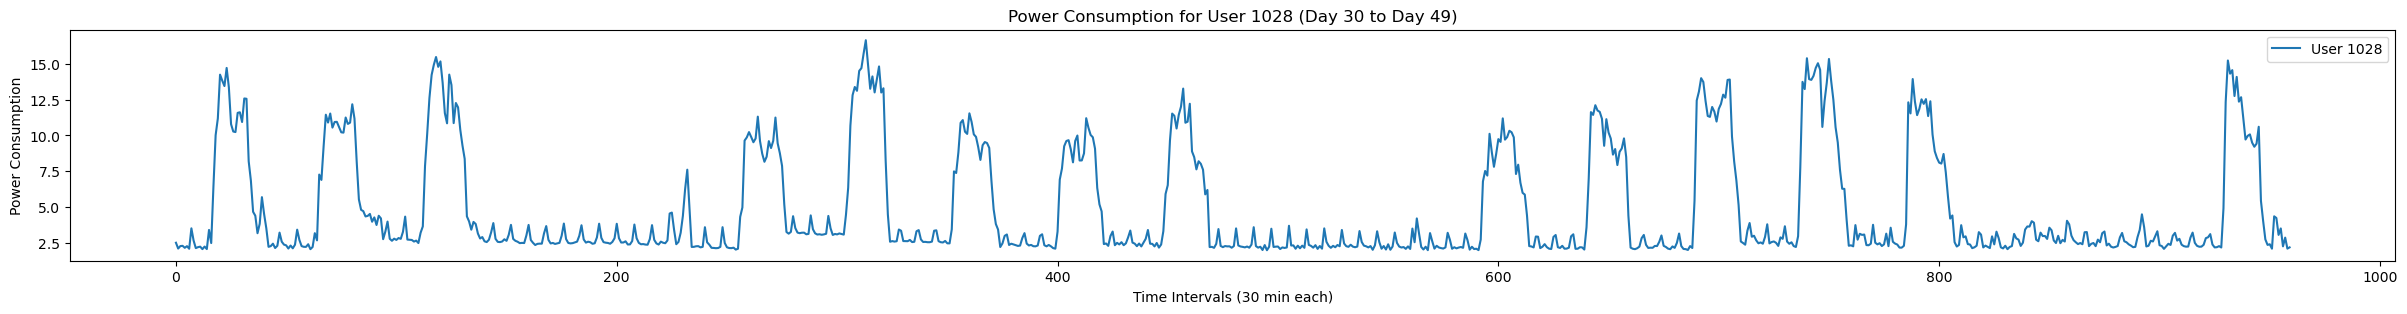

Feature extraction completed and saved to extracted_features.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_extraction import ComprehensiveFCParameters

# Define the file path
file_path = r'C:\Users\Shubh\OneDrive\Desktop\new data set final\dataset.csv'

# Load the dataset
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()
except Exception as e:
    print("An error occurred while loading the dataset:", e)
    exit()

# Check if the column for user 1028 exists
user_id = '1028'
if user_id not in data.columns:
    print(f"User ID {user_id} not found in dataset. Available columns are:", data.columns)
    exit()

# Extract data for the given user ID
user_data = data[user_id]

# Define the starting and ending days based on student IDs
start_day = 30  # Truncated average of 29 and 32
end_day = 49
rows_per_day = 48
start_idx = (start_day - 1) * rows_per_day
end_idx = end_day * rows_per_day

# Slice the data for the specified 20-day period
selected_data = user_data.iloc[start_idx:end_idx]

# Check if the data slice has the expected size
if len(selected_data) != (end_day - start_day + 1) * rows_per_day:
    print("The extracted data does not have the expected size. Please check the dataset structure.")
    exit()

# Create a DataFrame with time indices for tsfresh
df_tsfresh = pd.DataFrame({
    'value': selected_data.values,
    'time': np.arange(len(selected_data)),
    'id': 1  # Single ID for the entire dataset
})

# Extract features using tsfresh
settings = ComprehensiveFCParameters()  # Use comprehensive feature extraction settings
features = extract_features(df_tsfresh, column_id='id', column_sort='time', default_fc_parameters=settings)

# Plot the data
plt.figure(figsize=(30, 3))
plt.plot(selected_data.reset_index(drop=True), label=f'User {user_id}')
plt.title(f'Power Consumption for User {user_id} (Day {start_day} to Day {end_day})')
plt.xlabel('Time Intervals (30 min each)')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

# Save extracted features to CSV
features.to_csv(r'C:\Users\moham\OneDrive\Desktop\new data set final\extracted_features.csv')
print("Feature extraction completed and saved to extracted_features.csv")


Dataset loaded successfully.


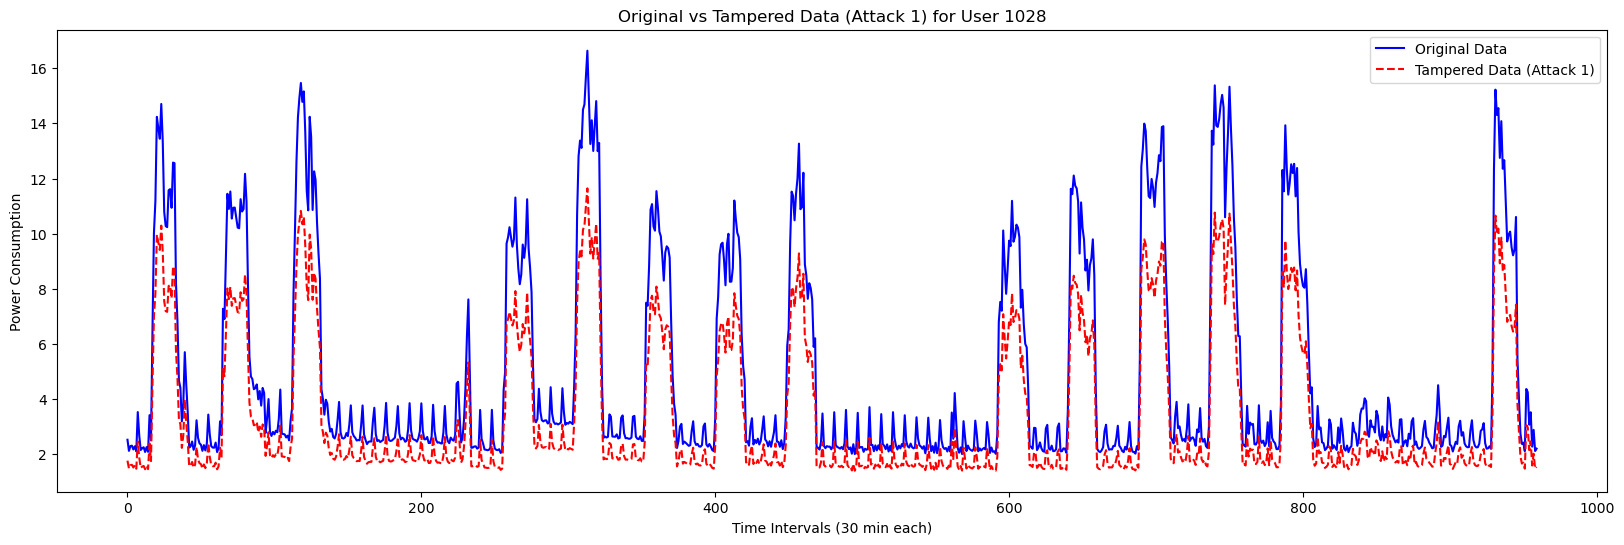

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the file path
file_path = r'C:\Users\moham\OneDrive\Desktop\new data set final\dataset.csv'

# Load the dataset
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()
except Exception as e:
    print("An error occurred while loading the dataset:", e)
    exit()

# Check if the column for user 1028 exists
user_id = '1028'
if user_id not in data.columns:
    print(f"User ID {user_id} not found in dataset. Available columns are:", data.columns)
    exit()

# Extract data for the given user ID
user_data = data[user_id]

# Define the starting and ending days based on student IDs
start_day = 30  # Truncated average of 29 and 32
end_day = 49
rows_per_day = 48
start_idx = (start_day - 1) * rows_per_day
end_idx = end_day * rows_per_day

# Slice the data for the specified 20-day period
original_data = user_data.iloc[start_idx:end_idx]

# Implement Attack 1: constant reduction
reduction_factor = 0.7  # Example reduction factor (30% reduction)
tampered_data = original_data * reduction_factor

# Plot original vs tampered data
plt.figure(figsize=(20, 6))
plt.plot(original_data.reset_index(drop=True), label='Original Data', color='blue')
plt.plot(tampered_data.reset_index(drop=True), label='Tampered Data (Attack 1)', color='red', linestyle='--')
plt.title(f'Original vs Tampered Data (Attack 1) for User {user_id}')
plt.xlabel('Time Intervals (30 min each)')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()


Dataset loaded successfully.


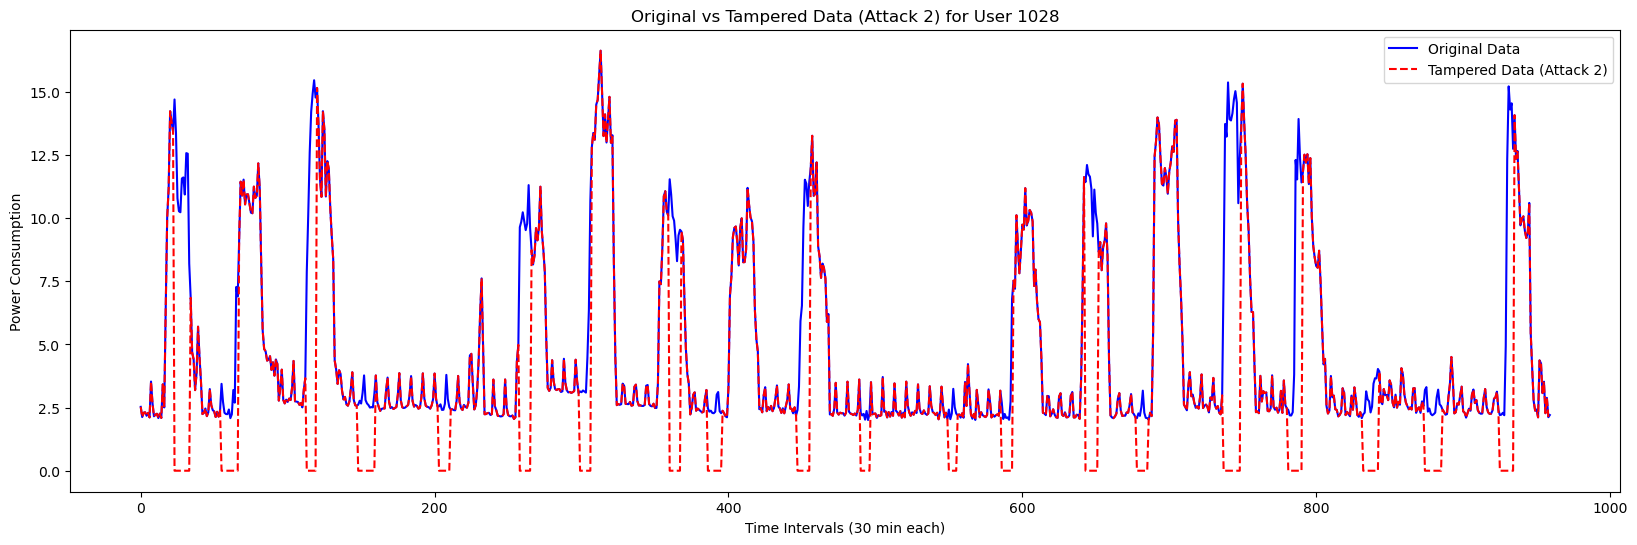

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the file path
file_path = r'C:\Users\moham\OneDrive\Desktop\new data set final\dataset.csv'

# Load the dataset
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()
except Exception as e:
    print("An error occurred while loading the dataset:", e)
    exit()

# Check if the column for user 1028 exists
user_id = '1028'
if user_id not in data.columns:
    print(f"User ID {user_id} not found in dataset. Available columns are:", data.columns)
    exit()

# Extract data for the given user ID
user_data = data[user_id]

# Define the starting and ending days based on student IDs
start_day = 30  # Truncated average of 29 and 32
end_day = 49
rows_per_day = 48
start_idx = (start_day - 1) * rows_per_day
end_idx = end_day * rows_per_day

# Slice the data for the specified 20-day period
original_data = user_data.iloc[start_idx:end_idx]

# Implement Attack 2: on-off attack (replace values with zero for random intervals)
tampered_data = original_data.copy()
for day in range(20):  # Loop through each day
    start_time = random.randint(0, rows_per_day // 2)  # Random start time within the first half of the day
    end_time = start_time + random.randint(6, 12)  # Random duration between 6 and 12 intervals
    day_start_idx = day * rows_per_day
    tampered_data.iloc[day_start_idx + start_time:day_start_idx + end_time] = 0

# Plot original vs tampered data
plt.figure(figsize=(20, 6))
plt.plot(original_data.reset_index(drop=True), label='Original Data', color='blue')
plt.plot(tampered_data.reset_index(drop=True), label='Tampered Data (Attack 2)', color='red', linestyle='--')
plt.title(f'Original vs Tampered Data (Attack 2) for User {user_id}')
plt.xlabel('Time Intervals (30 min each)')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()



Dataset loaded successfully.


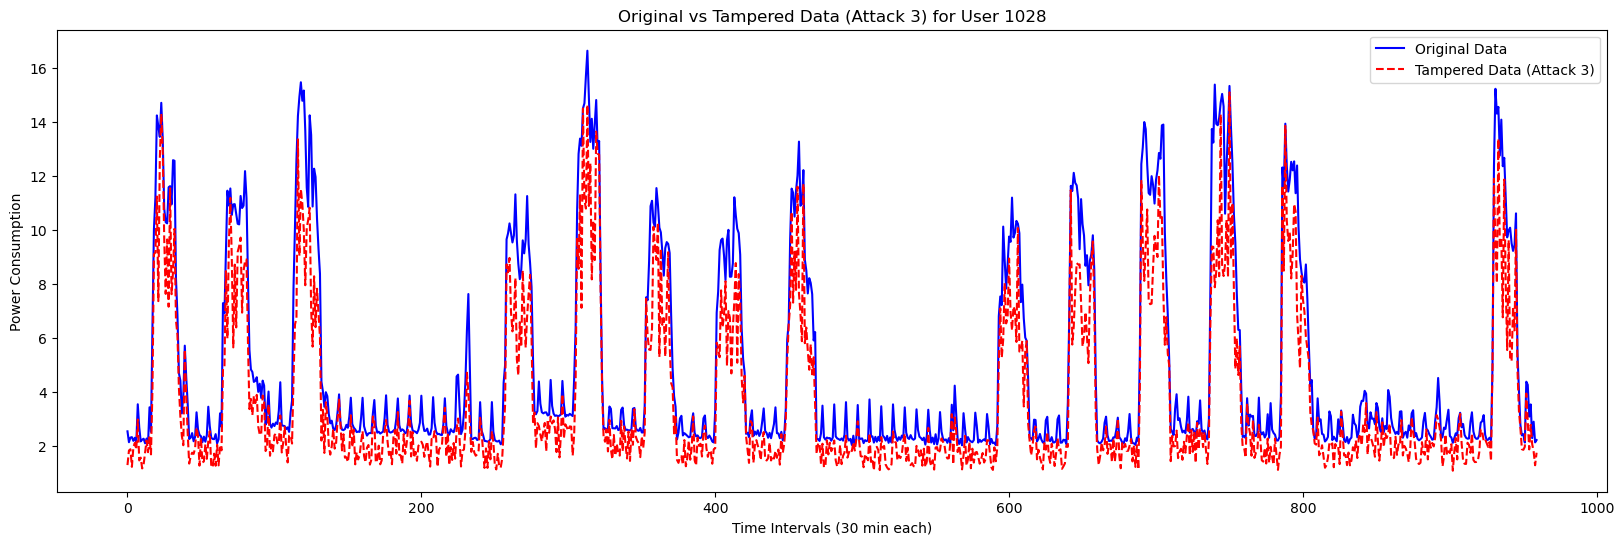

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the file path
file_path = r'C:\Users\moham\OneDrive\Desktop\new data set final\dataset.csv'

# Load the dataset
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()
except Exception as e:
    print("An error occurred while loading the dataset:", e)
    exit()

# Check if the column for user 1028 exists
user_id = '1028'
if user_id not in data.columns:
    print(f"User ID {user_id} not found in dataset. Available columns are:", data.columns)
    exit()

# Extract data for the given user ID
user_data = data[user_id]

# Define the starting and ending days based on student IDs
start_day = 30  # Truncated average of 29 and 32
end_day = 49
rows_per_day = 48
start_idx = (start_day - 1) * rows_per_day
end_idx = end_day * rows_per_day

# Slice the data for the specified 20-day period
original_data = user_data.iloc[start_idx:end_idx]

# Implement Attack 3: varying reduction attack
tampered_data = original_data.copy()
reduction_factors = np.random.uniform(0.5, 1.0, size=len(tampered_data))  # Random factors between 0.5 and 1
tampered_data = tampered_data * reduction_factors

# Plot original vs tampered data
plt.figure(figsize=(20, 6))
plt.plot(original_data.reset_index(drop=True), label='Original Data', color='blue')
plt.plot(tampered_data.reset_index(drop=True), label='Tampered Data (Attack 3)', color='red', linestyle='--')
plt.title(f'Original vs Tampered Data (Attack 3) for User {user_id}')
plt.xlabel('Time Intervals (30 min each)')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()


Dataset loaded successfully.


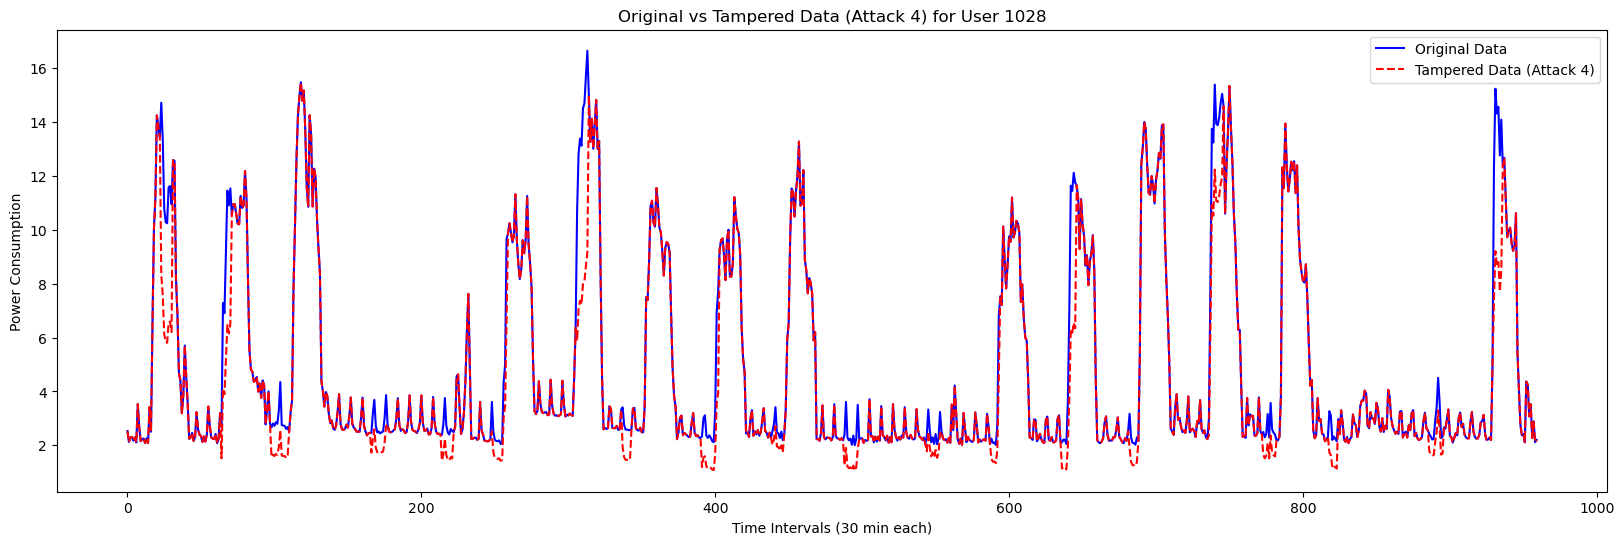

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the file path
file_path = r'C:\Users\moham\OneDrive\Desktop\new data set final\dataset.csv'

# Load the dataset
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()
except Exception as e:
    print("An error occurred while loading the dataset:", e)
    exit()

# Check if the column for user 1028 exists
user_id = '1028'
if user_id not in data.columns:
    print(f"User ID {user_id} not found in dataset. Available columns are:", data.columns)
    exit()

# Extract data for the given user ID
user_data = data[user_id]

# Define the starting and ending days based on student IDs
start_day = 30  # Truncated average of 29 and 32
end_day = 49
rows_per_day = 48
start_idx = (start_day - 1) * rows_per_day
end_idx = end_day * rows_per_day

# Slice the data for the specified 20-day period
original_data = user_data.iloc[start_idx:end_idx]

# Implement Attack 4: periodic varying reduction
tampered_data = original_data.copy()
for day in range(20):  # Loop through each day
    start_time = random.randint(0, rows_per_day // 2)  # Random start time in the first half of the day
    end_time = start_time + random.randint(6, 12)  # Random duration between 6 and 12 intervals
    reduction_factor = random.uniform(0.5, 0.8)  # Random reduction factor between 0.5 and 0.8
    day_start_idx = day * rows_per_day
    tampered_data.iloc[day_start_idx + start_time:day_start_idx + end_time] *= reduction_factor

# Plot original vs tampered data
plt.figure(figsize=(20, 6))
plt.plot(original_data.reset_index(drop=True), label='Original Data', color='blue')
plt.plot(tampered_data.reset_index(drop=True), label='Tampered Data (Attack 4)', color='red', linestyle='--')
plt.title(f'Original vs Tampered Data (Attack 4) for User {user_id}')
plt.xlabel('Time Intervals (30 min each)')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()


Dataset loaded successfully.


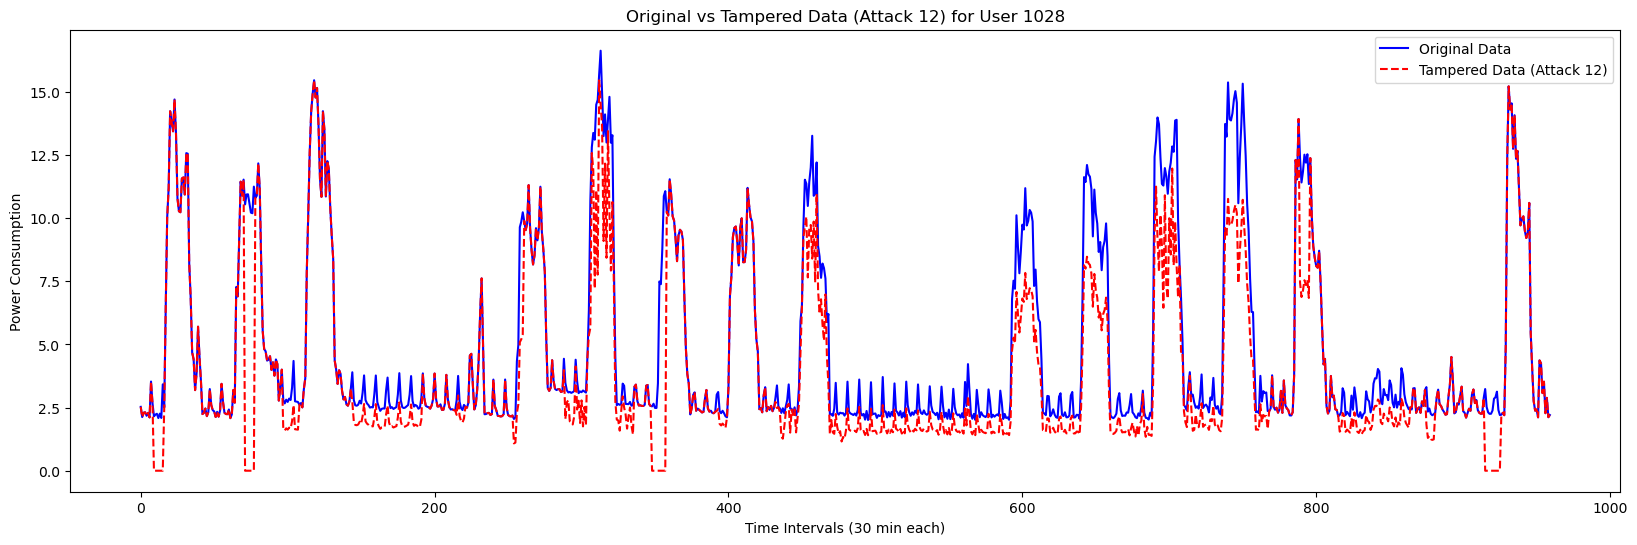

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the file path
file_path = r'C:\Users\moham\OneDrive\Desktop\new data set final\dataset.csv'

# Load the dataset
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()
except Exception as e:
    print("An error occurred while loading the dataset:", e)
    exit()

# Check if the column for user 1028 exists
user_id = '1028'
if user_id not in data.columns:
    print(f"User ID {user_id} not found in dataset. Available columns are:", data.columns)
    exit()

# Extract data for the given user ID
user_data = data[user_id]

# Define the starting and ending days based on student IDs
start_day = 30  # Truncated average of 29 and 32
end_day = 49
rows_per_day = 48
start_idx = (start_day - 1) * rows_per_day
end_idx = end_day * rows_per_day

# Slice the data for the specified 20-day period
original_data = user_data.iloc[start_idx:end_idx]

# Define helper functions for attacks
def attack_1(data):
    reduction_factor = 0.7  # 30% reduction
    return data * reduction_factor

def attack_2(data):
    tampered = data.copy()
    start_time = random.randint(0, rows_per_day // 2)
    end_time = start_time + random.randint(6, 12)
    tampered[start_time:end_time] = 0
    return tampered

def attack_3(data):
    reduction_factors = np.random.uniform(0.5, 1.0, size=len(data))
    return data * reduction_factors

def attack_4(data):
    tampered = data.copy()
    start_time = random.randint(0, rows_per_day // 2)
    end_time = start_time + random.randint(6, 12)
    reduction_factor = random.uniform(0.5, 0.8)
    tampered[start_time:end_time] *= reduction_factor
    return tampered

# Implement Attack 12: Randomly choose one of the attacks for each day
tampered_data = original_data.copy()
for day in range(20):
    day_start_idx = day * rows_per_day
    day_end_idx = (day + 1) * rows_per_day
    daily_data = original_data.iloc[day_start_idx:day_end_idx]

    # Randomly choose one attack
    attack_choice = random.choice([attack_1, attack_2, attack_3, attack_4])
    tampered_data.iloc[day_start_idx:day_end_idx] = attack_choice(daily_data)

# Plot original vs tampered data
plt.figure(figsize=(20, 6))
plt.plot(original_data.reset_index(drop=True), label='Original Data', color='blue')
plt.plot(tampered_data.reset_index(drop=True), label='Tampered Data (Attack 12)', color='red', linestyle='--')
plt.title(f'Original vs Tampered Data (Attack 12) for User {user_id}')
plt.xlabel('Time Intervals (30 min each)')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()


In [ ]:
pip install tsfresh


In [ ]:
import pandas as pd
import numpy as np
from tsfresh.feature_extraction import extract_features, ComprehensiveFCParameters
import matplotlib.pyplot as plt

# Define the file path
file_path = r'C:\Users\moham\OneDrive\Desktop\new data set final\dataset.csv'

# Load the dataset
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()
except Exception as e:
    print("An error occurred while loading the dataset:", e)
    exit()

# Check if the column for user 1028 exists
user_id = '1028'
if user_id not in data.columns:
    print(f"User ID {user_id} not found in dataset. Available columns are:", data.columns)
    exit()

# Extract data for the given user ID
user_data = data[user_id]

# Define the starting and ending days based on student IDs
start_day = 30  # Truncated average of 29 and 32
end_day = 49
rows_per_day = 48
start_idx = (start_day - 1) * rows_per_day
end_idx = end_day * rows_per_day

# Slice the data for the specified 20-day period
selected_data = user_data.iloc[start_idx:end_idx]

# Prepare data for tsfresh
# Add time and id columns to create the required structure
df_tsfresh = pd.DataFrame({
    'time': np.tile(np.arange(rows_per_day), end_day - start_day + 1),  # Time intervals for each day
    'id': np.repeat(np.arange(1, 21), rows_per_day),  # Day ID
    'value': selected_data.values  # Power consumption values
})

# Extract features using tsfresh
settings = ComprehensiveFCParameters()  # Use comprehensive feature extraction
features = extract_features(df_tsfresh, column_id='id', column_sort='time', default_fc_parameters=settings)

# Display and save the extracted features
print("Extracted features:")
print(features.head())

# Save features to CSV
output_file = r'C:\Users\moham\OneDrive\Desktop\new data set final\extracted_features.csv'
features.to_csv(output_file)
print(f"Extracted features saved to: {output_file}")


Dataset loaded successfully.


Feature Extraction: 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

Extracted features:
   value__variance_larger_than_standard_deviation  value__has_duplicate_max  \
1                                             1.0                       0.0   
2                                             1.0                       0.0   
3                                             1.0                       0.0   
4                                             0.0                       0.0   
5                                             1.0                       0.0   

   value__has_duplicate_min  value__has_duplicate  value__sum_values  \
1                       0.0                   0.0            288.464   
2                       0.0                   0.0            282.300   
3                       0.0                   0.0            323.056   
4                       0.0                   1.0            133.624   
5                       0.0                   1.0            144.942   

   value__abs_energy  value__mean_abs_change  value__mean_change  \
1   

In [ ]:
import pandas as pd
import numpy as np

# Define the file path
file_path = r'C:\Users\moham\OneDrive\Desktop\new data set final\dataset.csv'

# Load the dataset
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()
except Exception as e:
    print("An error occurred while loading the dataset:", e)
    exit()

# Check if the column for user 1028 exists
user_id = '1028'
if user_id not in data.columns:
    print(f"User ID {user_id} not found in dataset. Available columns are:", data.columns)
    exit()

# Extract data for the given user ID
user_data = data[user_id]

# Define the starting and ending days based on student IDs
start_day = 30  # Truncated average of 29 and 32
end_day = 49
rows_per_day = 48
start_idx = (start_day - 1) * rows_per_day
end_idx = end_day * rows_per_day

# Slice the data for the specified 20-day period
selected_data = user_data.iloc[start_idx:end_idx]

# Split data by day and calculate features
features = []
for day in range(20):  # 20 days
    day_data = selected_data.iloc[day * rows_per_day: (day + 1) * rows_per_day]
    mean = day_data.mean()
    std = day_data.std()
    maximum = day_data.max()
    minimum = day_data.min()
    median = day_data.median()
    data_range = maximum - minimum
    features.append([mean, std, maximum, minimum, median, data_range])

# Create a DataFrame for the features
feature_df = pd.DataFrame(features, columns=['Mean', 'Standard Deviation', 'Maximum', 'Minimum', 'Median', 'Range'])
print("Extracted features:\n", feature_df)

# Save features to CSV
output_file = r'C:\Users\moham\OneDrive\Desktop\new data set final\custom_statistical_features.csv'
feature_df.to_csv(output_file, index=False)
print(f"Custom statistical features saved to: {output_file}")


Dataset loaded successfully.
Extracted features:
         Mean  Standard Deviation  Maximum  Minimum  Median    Range
0   6.009667            4.420461  14.7030    2.085  3.5310  12.6180
1   5.881250            3.653163  12.1720    2.082  4.3800  10.0900
2   6.730333            4.737521  15.4645    2.508  3.9060  12.9565
3   2.783833            0.428042   3.8990    2.371  2.6010   1.5280
4   3.019625            1.080788   7.6170    2.207  2.5780   5.4100
5   5.433229            3.303288  11.3110    2.051  3.5825   9.2600
6   6.914448            5.118950  16.6335    2.575  3.4605  14.0585
7   5.323479            3.365674  11.5430    2.231  3.3805   9.3120
8   5.074667            3.222826  11.2020    2.117  3.0640   9.0850
9   5.376875            3.719470  13.2650    2.174  3.1170  11.0910
10  2.413625            0.449577   3.7110    2.008  2.2670   1.7030
11  2.459812            0.480425   4.2220    2.012  2.2780   2.2100
12  5.001625            3.236484  11.1900    2.016  2.9560   9.174

In [ ]:
import pandas as pd
import numpy as np

# Define the file path
file_path = r'C:\Users\moham\OneDrive\Desktop\new data set final\dataset.csv'

# Load the dataset
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()
except Exception as e:
    print("An error occurred while loading the dataset:", e)
    exit()

# Check if the column for user 1028 exists
user_id = '1028'
if user_id not in data.columns:
    print(f"User ID {user_id} not found in dataset. Available columns are:", data.columns)
    exit()

# Extract data for the given user ID
user_data = data[user_id]

# Define the starting and ending days based on student IDs
start_day = 30  # Truncated average of 29 and 32
end_day = 49
rows_per_day = 48
start_idx = (start_day - 1) * rows_per_day
end_idx = end_day * rows_per_day

# Slice the data for the specified 20-day period
selected_data = user_data.iloc[start_idx:end_idx]

# Generate features for each day
features = []
for day in range(20):  # 20 days
    day_data = selected_data.iloc[day * rows_per_day: (day + 1) * rows_per_day]
    features.append({
        'Day': day + 1,
        'Mean': day_data.mean(),
        'Standard Deviation': day_data.std(),
        'Maximum': day_data.max(),
        'Minimum': day_data.min(),
        'Median': day_data.median(),
        'Range': day_data.max() - day_data.min()
    })

# Create a DataFrame for the features
features_df = pd.DataFrame(features)

# Display the features table
print("Generated Features Table:")
print(features_df)

# Save features table to CSV
output_file = r'C:\Users\moham\OneDrive\Desktop\new data set final\features_table.csv'
features_df.to_csv(output_file, index=False)
print(f"Features table saved to: {output_file}")


Dataset loaded successfully.
Generated Features Table:
    Day      Mean  Standard Deviation  Maximum  Minimum  Median    Range
0     1  6.009667            4.420461  14.7030    2.085  3.5310  12.6180
1     2  5.881250            3.653163  12.1720    2.082  4.3800  10.0900
2     3  6.730333            4.737521  15.4645    2.508  3.9060  12.9565
3     4  2.783833            0.428042   3.8990    2.371  2.6010   1.5280
4     5  3.019625            1.080788   7.6170    2.207  2.5780   5.4100
5     6  5.433229            3.303288  11.3110    2.051  3.5825   9.2600
6     7  6.914448            5.118950  16.6335    2.575  3.4605  14.0585
7     8  5.323479            3.365674  11.5430    2.231  3.3805   9.3120
8     9  5.074667            3.222826  11.2020    2.117  3.0640   9.0850
9    10  5.376875            3.719470  13.2650    2.174  3.1170  11.0910
10   11  2.413625            0.449577   3.7110    2.008  2.2670   1.7030
11   12  2.459812            0.480425   4.2220    2.012  2.2780   2.2

In [ ]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\moham\OneDrive\Desktop\new data set final\dataset.csv'
data = pd.read_csv(file_path)
user_id = '1028'

# Extract user data
user_data = data[user_id]

# Define parameters
start_day = 30
end_day = 49
rows_per_day = 48
start_idx = (start_day - 1) * rows_per_day
end_idx = end_day * rows_per_day

# Slice the data
selected_data = user_data.iloc[start_idx:end_idx].reset_index(drop=True)

# Compute features
def compute_features(data, rows_per_day=48):
    features = []
    for day in range(20):
        day_data = data.iloc[day * rows_per_day: (day + 1) * rows_per_day]
        features.append({
            'Day': day + 1,
            'Mean': day_data.mean(),
            'Standard Deviation': day_data.std(),
            'Maximum': day_data.max(),
            'Minimum': day_data.min(),
            'Median': day_data.median(),
            'Range': day_data.max() - day_data.min()
        })
    return pd.DataFrame(features)

# Generate normal feature table
normal_features = compute_features(selected_data)
normal_features.to_csv(r'C:\Users\moham\OneDrive\Desktop\new data set final\features_normal.csv', index=False)
print("Normal feature table saved as features_normal.csv")


Normal feature table saved as features_normal.csv


In [ ]:
def attack_1(data, reduction_factor=0.7):
    return data * reduction_factor

# Apply Attack 1
attack_1_data = attack_1(selected_data)
attack_1_features = compute_features(attack_1_data)
attack_1_features.to_csv(r'C:\Users\moham\OneDrive\Desktop\new data set final\features_attack_1.csv', index=False)
print("Attack 1 feature table saved as features_attack_1.csv")


Attack 1 feature table saved as features_attack_1.csv


In [ ]:
import random

def attack_2(data):
    tampered = data.copy()
    for day in range(20):
        start_idx = day * rows_per_day
        end_idx = (day + 1) * rows_per_day
        day_data = tampered[start_idx:end_idx].copy()
        start_time = random.randint(0, rows_per_day // 2)
        end_time = start_time + random.randint(6, 12)
        day_data[start_time:end_time] = 0
        tampered[start_idx:end_idx] = day_data
    return tampered

# Apply Attack 2
attack_2_data = attack_2(selected_data)
attack_2_features = compute_features(attack_2_data)
attack_2_features.to_csv(r'C:\Users\moham\OneDrive\Desktop\new data set final\features_attack_2.csv', index=False)
print("Attack 2 feature table saved as features_attack_2.csv")


Attack 2 feature table saved as features_attack_2.csv


In [ ]:
import numpy as np

def attack_3(data):
    reduction_factors = np.random.uniform(0.5, 1.0, size=len(data))
    return data * reduction_factors

# Apply Attack 3
attack_3_data = attack_3(selected_data)
attack_3_features = compute_features(attack_3_data)
attack_3_features.to_csv(r'C:\Users\moham\OneDrive\Desktop\new data set final\features_attack_3.csv', index=False)
print("Attack 3 feature table saved as features_attack_3.csv")


Attack 3 feature table saved as features_attack_3.csv


In [ ]:
def attack_4(data):
    tampered = data.copy()
    for day in range(20):
        start_idx = day * rows_per_day
        end_idx = (day + 1) * rows_per_day
        day_data = tampered[start_idx:end_idx].copy()
        start_time = random.randint(0, rows_per_day // 2)
        end_time = min(start_time + random.randint(6, 12), rows_per_day)
        reduction_factor = random.uniform(0.5, 0.8)
        day_data[start_time:end_time] *= reduction_factor
        tampered[start_idx:end_idx] = day_data
    return tampered

# Apply Attack 4
attack_4_data = attack_4(selected_data)
attack_4_features = compute_features(attack_4_data)
attack_4_features.to_csv(r'C:\Users\moham\OneDrive\Desktop\new data set final\features_attack_4.csv', index=False)
print("Attack 4 feature table saved as features_attack_4.csv")


Attack 4 feature table saved as features_attack_4.csv


In [ ]:
import pandas as pd
import numpy as np
import random

# Define the file path
file_path = r'C:\Users\moham\OneDrive\Desktop\new data set final\dataset.csv'

# Load the dataset
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")
    exit()

# Check if the column for user 1028 exists
user_id = '1028'
if user_id not in data.columns:
    print(f"User ID {user_id} not found in dataset. Available columns are: {data.columns}")
    exit()

# Extract data for the given user ID
user_data = data[user_id]

# Define parameters
start_day = 30
end_day = 49
rows_per_day = 48
start_idx = (start_day - 1) * rows_per_day
end_idx = end_day * rows_per_day

# Slice the data for the specified 20-day period
selected_data = user_data.iloc[start_idx:end_idx].reset_index(drop=True)

# Helper function to compute features for a dataset
def compute_features(data, rows_per_day=48):
    features = []
    for day in range(20):
        day_data = data.iloc[day * rows_per_day: (day + 1) * rows_per_day]
        features.append({
            'Day': day + 1,
            'Mean': day_data.mean(),
            'Standard Deviation': day_data.std(),
            'Maximum': day_data.max(),
            'Minimum': day_data.min(),
            'Median': day_data.median(),
            'Range': day_data.max() - day_data.min()
        })
    return pd.DataFrame(features)

# Attack 1: Constant reduction
def attack_1(data, reduction_factor=0.7):
    return data * reduction_factor

# Attack 2: On-off attack
def attack_2(data):
    tampered = data.copy()
    for day in range(20):
        start_idx = day * rows_per_day
        end_idx = (day + 1) * rows_per_day
        day_data = tampered[start_idx:end_idx].copy()
        start_time = random.randint(0, rows_per_day // 2)
        end_time = start_time + random.randint(6, 12)
        day_data[start_time:end_time] = 0
        tampered[start_idx:end_idx] = day_data
    return tampered

# Attack 3: Varying reduction
def attack_3(data):
    reduction_factors = np.random.uniform(0.5, 1.0, size=len(data))
    return data * reduction_factors

# Attack 4: Periodic varying reduction
def attack_4(data):
    tampered = data.copy()
    for day in range(20):
        start_idx = day * rows_per_day
        end_idx = (day + 1) * rows_per_day
        day_data = tampered[start_idx:end_idx].copy()
        start_time = random.randint(0, rows_per_day // 2)
        end_time = min(start_time + random.randint(6, 12), rows_per_day)
        reduction_factor = random.uniform(0.5, 0.8)
        tampered_day = day_data.copy()
        tampered_day[start_time:end_time] *= reduction_factor
        if len(tampered_day) != len(day_data):
            print(f"Length mismatch in attack_4 for day {day + 1}. Skipping this day.")
            continue
        tampered[start_idx:end_idx] = tampered_day
    return tampered

# Attack 12: Random attack selection
def attack_12(data):
    tampered = data.copy()
    for day in range(20):
        start_idx = day * rows_per_day
        end_idx = (day + 1) * rows_per_day
        day_data = tampered[start_idx:end_idx].copy()
        attack_choice = random.choice([attack_1, attack_2, attack_3, attack_4])
        print(f"Day {day + 1}: Applying {attack_choice.__name__}")
        try:
            tampered_day_data = attack_choice(day_data)
            if len(tampered_day_data) != len(day_data):
                print(f"Length mismatch in {attack_choice.__name__} for day {day + 1}. Skipping this day.")
                continue
            tampered[start_idx:end_idx] = tampered_day_data
        except Exception as e:
            print(f"Error in {attack_choice.__name__} for day {day + 1}: {e}")
            continue
    print("Attack 12 completed successfully.")
    return tampered

# Generate Attack 12 tampered data and save feature table
try:
    print("Generating Attack 12 tampered data...")
    attack_12_data = attack_12(selected_data)
    print("Attack 12 tampered data generated.")
    print("Computing features for Attack 12 tampered data...")
    attack_12_features = compute_features(attack_12_data)
    print("Preview of Attack 12 features:")
    print(attack_12_features.head())
    output_path = r'C:\Users\moham\OneDrive\Desktop\new data set final\features_attack_12.csv'
    attack_12_features.to_csv(output_path, index=False)
    print(f"Attack 12 feature table saved successfully at: {output_path}")
except Exception as e:
    print(f"Error during Attack 12 processing or saving: {e}")


Dataset loaded successfully.
Generating Attack 12 tampered data...
Day 1: Applying attack_3
Day 2: Applying attack_1
Day 3: Applying attack_1
Day 4: Applying attack_4
Error in attack_4 for day 4: cannot set using a slice indexer with a different length than the value
Day 5: Applying attack_2
Error in attack_2 for day 5: cannot set using a slice indexer with a different length than the value
Day 6: Applying attack_1
Day 7: Applying attack_1
Day 8: Applying attack_2
Error in attack_2 for day 8: cannot set using a slice indexer with a different length than the value
Day 9: Applying attack_4
Error in attack_4 for day 9: cannot set using a slice indexer with a different length than the value
Day 10: Applying attack_1
Day 11: Applying attack_4
Error in attack_4 for day 11: cannot set using a slice indexer with a different length than the value
Day 12: Applying attack_1
Day 13: Applying attack_3
Day 14: Applying attack_2
Error in attack_2 for day 14: cannot set using a slice indexer with a di